In [1]:
import pandas as pd #untuk dataframe
import pylab as pl #untuk plotting
from matplotlib import pyplot as plt
import numpy as np
import sklearn 
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [10]:
df = pd.read_csv("goldx.csv") 


df.head()

,Date,Price,Open,High,Low
0,"Aug 01, 2018",1216.6,1223.4,1223.4,1216.2
1,"Jul 31, 2018",1223.7,1220.4,1228.1,1213.0
2,"Jul 30, 2018",1221.3,1222.5,1223.9,1218.1
3,"Jul 27, 2018",1222.2,1223.5,1226.8,1216.7
4,"Jul 26, 2018",1225.3,1227.8,1227.8,1227.8


In [11]:
df1 = df[['Open','High','Low','Price']]
df1.head(9)

,Open,High,Low,Price
0,1223.4,1223.4,1216.2,1216.6
1,1220.4,1228.1,1213.0,1223.7
2,1222.5,1223.9,1218.1,1221.3
3,1223.5,1226.8,1216.7,1222.2
4,1227.8,1227.8,1227.8,1225.3
5,1225.3,1234.3,1223.2,1233.0
6,1224.4,1229.6,1218.2,1225.3
7,1222.0,1222.0,1222.0,1224.0
8,1229.5,1229.5,1229.5,1229.5


In [12]:
cdf=df1.fillna(df1.mean())
cdf.head(9)

,Open,High,Low,Price
0,1223.4,1223.4,1216.2,1216.6
1,1220.4,1228.1,1213.0,1223.7
2,1222.5,1223.9,1218.1,1221.3
3,1223.5,1226.8,1216.7,1222.2
4,1227.8,1227.8,1227.8,1225.3
5,1225.3,1234.3,1223.2,1233.0
6,1224.4,1229.6,1218.2,1225.3
7,1222.0,1222.0,1222.0,1224.0
8,1229.5,1229.5,1229.5,1229.5


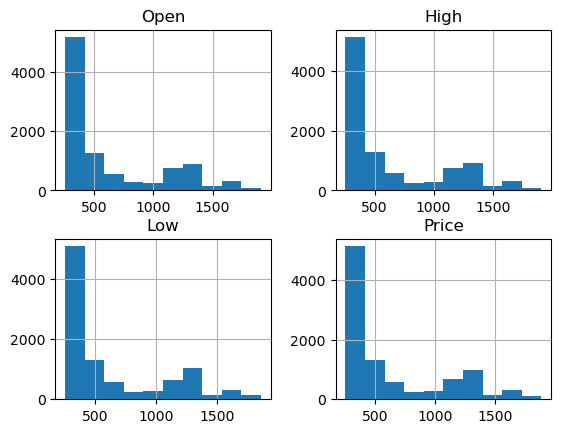

In [13]:
viz = cdf [['Open','High','Low','Price']]
viz.hist()
plt.show()

In [14]:
cdf.describe()

,Open,High,Low,Price
count,9771.000000,9771.000000,9771.000000,9771.000000
mean,639.059523,641.936432,635.853220,638.922221
std,419.894281,422.504386,416.955696,419.776826
min,252.900000,252.900000,252.500000,253.000000
25%,351.200000,352.000000,350.500000,351.150000
50%,407.800000,409.000000,406.300000,407.900000
75%,926.000000,932.550000,920.500000,926.750000
max,1909.000000,1911.600000,1864.000000,1888.700000


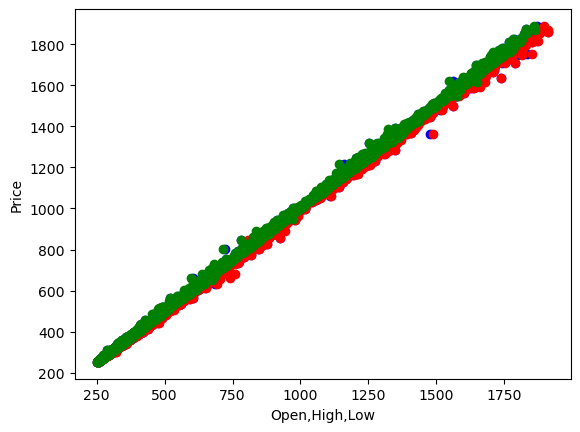

In [15]:
plt.scatter(cdf.Open, cdf.Price, color='blue')
plt.scatter(cdf.High, cdf.Price, color='red')
plt.scatter(cdf.Low, cdf.Price, color='green')
plt.xlabel("Open,High,Low")
plt.ylabel("Price")
plt.show()

In [16]:
msk = np.random.rand(len(cdf)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [17]:
#Membuat model regresi
regr = LinearRegression()
train_x = np.asanyarray(train[['Open','High','Low']])
train_y = np.asanyarray(train[['Price']])
regr.fit (train_x, train_y)

# Koefisien model
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-0.57801666  0.78365565  0.79472153]]
Intercept:  [-0.06535202]


In [18]:
test_x = np.asanyarray(test[['Open','High','Low']])
test_y = np.asanyarray(test[['Price']])

In [19]:
#Menghitung error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math

test_y_ = regr.predict(test_x)

print("Mean absolute error (MAE): %.2f" % mean_absolute_error(test_y_,test_y))
print("Mean squared error (MSE): %.2f" % mean_squared_error(test_y_,test_y))
print("Roots Mean Squared error (RMSE) : %.2f" % math.sqrt(mean_squared_error(test_y_,test_y)))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error (MAE): 1.71
Mean squared error (MSE): 12.68
Roots Mean Squared error (RMSE) : 3.56
R2-score: 1.00


In [ ]:
import pickle
pickle.dump(regr, open('gold.pkl','wb'))